In [27]:
import os
from bs4 import BeautifulSoup as bs
import optparse
import sys
from pathlib import Path
import requests
import pandas as pd
from lxml import etree
import re
from collections import Counter

# only used for remote repository!
# function to extract xml document from given url
def getXML(url):    
    # request for HTML document of given url
    response = requests.get(url)    
    # response will be provided in JSON format
    return response.text

In [168]:
# Load Local File

xml_doc = "Music_Files/CRIM_Model_0008.mei"

with open(xml_doc) as file:
    soup_mei = bs(file, 'xml')
    
print(soup_mei.prettify())

<?xml version="1.0" encoding="utf-8"?>
<?xml-model href="https://music-encoding.org/schema/4.0.1/mei-CMN.rng" type="application/xml" schematypens="http://relaxng.org/ns/structure/1.0"?>
<?xml-model href="https://music-encoding.org/schema/4.0.1/mei-CMN.rng" type="application/xml" schematypens="http://purl.oclc.org/dsdl/schematron"?>
<mei meiversion="4.0.0" xml:id="m-1" xmlns="http://www.music-encoding.org/ns/mei">
 <meiHead xml:id="m-2">
  <fileDesc xml:id="m-3">
   <titleStmt>
    <title>
     Ave Maria
    </title>
    <respStmt>
     <persName auth="VIAF" auth.uri="http://viaf.org/viaf/100226284" role="composer">
      Josquin Des Prés
     </persName>
     <persName role="editor">
      Marco Gurrieri
     </persName>
     <persName role="editor">
      Vincent Besson
     </persName>
     <persName role="editor">
      Richard Freedman
     </persName>
    </respStmt>
   </titleStmt>
   <pubStmt>
    <publisher>
     Citations: The Renaissance Imitation Mass Project
    </publisher

In [169]:
# load remote document
# assign required credentials
# assign URL
piece_url = "https://raw.githubusercontent.com/RichardFreedman/Encoding_Music/main/CRIM_Model_0002-SHORT.mei"
  
# create document
xml_document = getXML(piece_url)
  
# create soup object
soup_mei = bs(xml_document, 'xml')
print(soup_mei.prettify())

<?xml version="1.0" encoding="utf-8"?>
<?xml-model href="https://music-encoding.org/schema/4.0.1/mei-CMN.rng" type="application/xml" schematypens="http://relaxng.org/ns/structure/1.0"?>
<?xml-model href="https://music-encoding.org/schema/4.0.1/mei-CMN.rng" type="application/xml" schematypens="http://purl.oclc.org/dsdl/schematron"?>
<mei meiversion="4.0.0" xml:id="m-1" xmlns="http://www.music-encoding.org/ns/mei">
 <meiHead xml:id="m-2">
  <fileDesc xml:id="m-3">
   <titleStmt>
    <title>
     O gente brunette
    </title>
    <respStmt>
     <persName auth="VIAF" auth.uri="http://viaf.org/viaf/32264545" role="composer">
      Thomas Champion
     </persName>
     <persName role="editor">
      David Fiala
     </persName>
     <persName role="editor">
      Marco Gurrieri
     </persName>
     <persName role="editor">
      Vincent Besson
     </persName>
     <persName role="editor">
      Richard Freedman
     </persName>
    </respStmt>
   </titleStmt>
   <pubStmt>
    <publisher>


In [317]:
# find all the tags in the XML document
for tag in soup_mei.find_all(True):
    print(tag.name)

mei
meiHead
fileDesc
titleStmt
title
respStmt
persName
persName
persName
persName
persName
pubStmt
publisher
distributor
distributor
distributor
distributor
distributor
date
availability
encodingDesc
appInfo
application
name
application
name
application
name
application
name
workList
work
title
composer
persName
classification
termList
term
manifestationList
manifestation
identifier
titleStmt
title
pubStmt
publisher
persName
date
physLoc
repository
corpName
settlement
identifier
music
body
mdiv
score
scoreDef
staffGrp
staffGrp
staffDef
label
instrDef
staffDef
label
instrDef
staffDef
label
instrDef
staffDef
label
instrDef
section
measure
staff
layer
note
verse
syl
note
verse
syl
note
verse
syl
note
verse
syl
note
verse
syl
note
verse
syl
staff
layer
note
verse
syl
note
verse
syl
note
verse
syl
note
verse
syl
note
verse
syl
note
verse
syl
staff
layer
note
verse
syl
note
verse
syl
note
verse
syl
note
verse
syl
note
verse
syl
note
verse
syl
staff
layer
note
verse
syl
note
verse
syl
note
ve

In [323]:
# find tags that contain a particular attribute
for tag in soup_mei.find_all(True):
    if tag.has_attr('role'):
        print(tag)


<persName auth="VIAF" auth.uri="http://viaf.org/viaf/32264545" role="composer">Thomas Champion</persName>
<persName role="editor">David Fiala</persName>
<persName role="editor">Marco Gurrieri</persName>
<persName role="editor">Vincent Besson</persName>
<persName role="editor">Richard Freedman</persName>
<persName auth="VIAF" auth.uri="http://viaf.org/viaf/32264545" role="composer">Thomas Champion</persName>


In [480]:
soup_mei.titleStmt
soup_mei.pubStmt
soup_mei.manifestationList

<manifestationList xml:id="manifestationList">
<manifestation>
<identifier type="RISM">RISM B I, 1548-04</identifier>
<titleStmt>
<title>O gente brunette</title>
</titleStmt>
<pubStmt>
<publisher>
<persName auth="VIAF" auth.uri="http://viaf.org/viaf/59135590">Pierre Attaingnant</persName>
</publisher>
<date isodate="1548"/>
</pubStmt>
<physLoc>
<repository>
<corpName>Bayerische Staatsbibliothek</corpName>
<settlement>München</settlement>
</repository>
<identifier type="shelfmark"> Rar. 900-1/35#27 </identifier>
</physLoc>
</manifestation>
</manifestationList>

In [485]:
soup.measure.find_all('note')


[<note dur="4" dur.ppq="256" oct="5" pname="c" pnum="72" stem.dir="down" xml:id="m-48">
 <verse n="1" xml:id="m-54">
 <syl wordpos="i" xml:id="m-55">
             O
            </syl>
 </verse>
 </note>,
 <note dur="4" dur.ppq="256" oct="5" pname="c" pnum="72" stem.dir="down" xml:id="m-49">
 <verse n="1" xml:id="m-56">
 <syl con="d" wordpos="i" xml:id="m-57">
             gen
            </syl>
 </verse>
 </note>,
 <note dur="4" dur.ppq="256" oct="5" pname="c" pnum="72" stem.dir="down" xml:id="m-50">
 <verse n="1" xml:id="m-58">
 <syl wordpos="t" xml:id="m-59">
             te
            </syl>
 </verse>
 </note>,
 <note dur="4" dur.ppq="256" oct="5" pname="d" pnum="74" stem.dir="down" xml:id="m-51">
 <verse n="1" xml:id="m-60">
 <syl con="d" wordpos="i" xml:id="m-61">
             bru
            </syl>
 </verse>
 </note>,
 <note dur="2" dur.ppq="512" oct="5" pname="e" pnum="76" stem.dir="down" xml:id="m-52">
 <verse n="1" xml:id="m-62">
 <syl con="d" wordpos="m" xml:id="m-63">
     

In [393]:
for person in soup_mei.find_all('persName'):
    print(person.get('role'))
    print(person)



composer
<persName auth="VIAF" auth.uri="http://viaf.org/viaf/32264545" role="composer">Thomas Champion</persName>
editor
<persName role="editor">David Fiala</persName>
editor
<persName role="editor">Marco Gurrieri</persName>
editor
<persName role="editor">Vincent Besson</persName>
editor
<persName role="editor">Richard Freedman</persName>
composer
<persName auth="VIAF" auth.uri="http://viaf.org/viaf/32264545" role="composer">Thomas Champion</persName>
None
<persName auth="VIAF" auth.uri="http://viaf.org/viaf/59135590">Pierre Attaingnant</persName>


In [501]:
for parent in soup.note.find_parents():
    print(parent.name)

layer
staff
measure
section
score
mdiv
body
music
mei
[document]


In [391]:
# meiHead  > fileDesc > titleStmt > respStmt > title or persName

soup_mei.meiHead.fileDesc.titleStmt.findChildren('persName')#.respStmt.persName.get("role")

# music > body > mdiv > score > scoreDef> staffGrp > staffDef

[<persName auth="VIAF" auth.uri="http://viaf.org/viaf/32264545" role="composer">Thomas Champion</persName>,
 <persName role="editor">David Fiala</persName>,
 <persName role="editor">Marco Gurrieri</persName>,
 <persName role="editor">Vincent Besson</persName>,
 <persName role="editor">Richard Freedman</persName>]

In [463]:
for child in soup_mei.measure.note:
    print(child)



<verse n="1" xml:id="m-54">
<syl wordpos="i" xml:id="m-55">
            O
           </syl>
</verse>




In [475]:
notes = soup.measure.staff.find_all('note')
for note in notes:
    print(note.get('pname'))


c
c
c
d
e
g


find all the editors
find all the voice names
find all the accidentals
find the last note of the final measure in each voice part
find the time signatures, and the first measure to which they apply

In MEI, the staffDef provides information about each staff:  the clef, name, number of lines

In [477]:
# just the first
soup_mei.staffDef.text.strip()

'Superius'

In [394]:
# find ALL of the staves. 
# These are reported as a list.
soup_mei.find_all("staffDef")

<staffDef clef.line="2" clef.shape="G" key.sig="0" label="Superius" lines="5" n="1" xml:id="m-30">
<label>Superius</label>
<instrDef midi.channel="1" midi.pan="26" midi.volume="100" xml:id="m-32"/>
</staffDef>

In [396]:
# the FIRST staffDef element (including all the attributes)
# BS by default reports only the first of any element:
soup_mei.staffDef
# the 'text' that is the body of that element
soup_mei.staffDef.text
# now cleaned up
soup_mei.staffDef.text.strip()

'Superius'

In [397]:
for staff in soup_mei.find_all('staffDef'):
    print(staff.text.strip())

Superius
Contratenor
Tenor
Bassus


In [405]:
# find  of attribute string in ANY tag
results = soup_mei.find_all(True, {'role': "editor"})
results = soup_mei.find_all(True, {'role': "editor"})

In [408]:
# find ALL STAVES with a GIVEN CLEF by passing dictionary that specifies the requested type
# the final_all results are a bs list

results = soup_mei.find_all(True, {'role': "editor"})
for staff in results:
    print(staff.text.strip())


David Fiala
Marco Gurrieri
Vincent Besson
Richard Freedman


In [155]:
# the text of that first element
soup_mei.staffDef.text.strip()

'Superius'

In [409]:
# iterate over childen in titleStmt
# python iterator is 'list ready'

# all the children of titleStmt.  What are they, and how long?
for item in soup_mei.titleStmt.children:
    print(item.name)
    print(len(item))
    
    


title
1
respStmt
5


In [410]:
for item in soup_mei.titleStmt.title:
    print(item.text.strip())

O gente brunette


In [411]:
for item in soup_mei.titleStmt.respStmt:
    print(item.text.strip())

Thomas Champion
David Fiala
Marco Gurrieri
Vincent Besson
Richard Freedman


In [331]:
# the text of the composer element:
soup_mei.composer.text.strip()

'Thomas Champion'

In [428]:
# The attribute of composer.persName
soup_mei.composer.persName['auth.uri']

'http://viaf.org/viaf/32264545'

In [333]:
# Get to the title all the way down the tree:
soup_mei.meiHead.fileDesc.titleStmt.title


<title>O gente brunette</title>

In [334]:
# or directly
soup_mei.title

<title>O gente brunette</title>

In [335]:
# just the text
soup_mei.title.text.strip()

'O gente brunette'

In [66]:
# findChildren is a list, and so we can pick individual items
titleStmt = soup_mei.titleStmt.findChildren()
titleStmt[1]

<respStmt><persName auth="VIAF" auth.uri="http://viaf.org/viaf/32264545" role="composer">Thomas Champion</persName><persName role="editor">David Fiala</persName><persName role="editor">Marco Gurrieri</persName><persName role="editor">Vincent Besson</persName><persName role="editor">Richard Freedman</persName></respStmt>

In [444]:
first_person = soup_mei.titleStmt.find_all('persName')[0]
first_person.findNextSiblings()

[<persName role="editor">David Fiala</persName>,
 <persName role="editor">Marco Gurrieri</persName>,
 <persName role="editor">Vincent Besson</persName>,
 <persName role="editor">Richard Freedman</persName>]

In [366]:

#recursive gives a list
soup_mei.titleStmt.findChildren(recursive=True)

[<title>O gente brunette</title>,
 <respStmt><persName auth="VIAF" auth.uri="http://viaf.org/viaf/32264545" role="composer">Thomas Champion</persName><persName role="editor">David Fiala</persName><persName role="editor">Marco Gurrieri</persName><persName role="editor">Vincent Besson</persName><persName role="editor">Richard Freedman</persName></respStmt>,
 <persName auth="VIAF" auth.uri="http://viaf.org/viaf/32264545" role="composer">Thomas Champion</persName>,
 <persName role="editor">David Fiala</persName>,
 <persName role="editor">Marco Gurrieri</persName>,
 <persName role="editor">Vincent Besson</persName>,
 <persName role="editor">Richard Freedman</persName>]

`soup_mei.titleStmt.find_all('persName', {"role": "editor"})`

In [367]:
# finds all the persNames
soup_mei.titleStmt.find_all("persName", {"role": "composer"})
# or
soup_mei.titleStmt.find_all('persName', {"role": "editor"})

[<persName role="editor">David Fiala</persName>,
 <persName role="editor">Marco Gurrieri</persName>,
 <persName role="editor">Vincent Besson</persName>,
 <persName role="editor">Richard Freedman</persName>]

In [438]:
# these are the NEXT sibs (after the first!)
names = soup_mei.titleStmt.persName.findNextSiblings()
names
# soup_mei.titleStmt.persName


[]

In [369]:
# how many notes?
notes = soup_mei.find_all(name='note')
len(notes)

24

In [445]:
# gets just the first pitch
pitch = soup_mei.note.get('pname')
pitch

'c'

In [446]:
# find all the notes and print pitch names
for note in soup_mei.find_all(name='note'):
    print(note.get('pname'))

c
c
c
d
e
g
c
g
f
f
e
e
a
g
a
b
c
c
f
e
f
d
c
e


In [447]:
# count pitches in MEI file.  Easier way below.

notes = soup_mei.find_all('note')
pitches = []
for note in notes:
    pitch = note.get('pname')
    pitches.append(pitch)
for pitch in set(pitches):
    print(pitch +  " occurs " + str(pitches.count(pitch)) + " times in this piece.")

e occurs 5 times in this piece.
a occurs 2 times in this piece.
d occurs 2 times in this piece.
c occurs 7 times in this piece.
g occurs 3 times in this piece.
b occurs 1 times in this piece.
f occurs 4 times in this piece.


In [169]:
notes = soup_mei.find_all('note')
pitches = []
for note in notes:
    pitch = note.get('pname')
    pitches.append(pitch)
for pitch in set(pitches):
    print(f"{pitch} occurs {pitches.count(pitch)} times in this piece.")

c occurs 268 times in this piece.
b occurs 108 times in this piece.
g occurs 187 times in this piece.
a occurs 101 times in this piece.
f occurs 103 times in this piece.
d occurs 144 times in this piece.
e occurs 150 times in this piece.


In [372]:
# last pitch in last measure, for each voice
measures = soup_mei.find_all('measure')
last_measure = measures[-1]
for staff in last_measure.find_all('staff'):
        note = staff.find_all('note')[-1]
        print(note.get('pname'))


g
e
c
e


In [448]:

# counts pitches, now as dictionary
pitches = [n.get('pname') for n in soup.find_all('note')]
counted = Counter(pitches)
df = pd.Series(counted)
df.to_frame()

# to bar chart

,0
c,7
d,2
e,5
g,3
f,4
a,2
b,1


In [449]:
# Report TS Changes and where they occur
scoredefs = soup_mei.find_all('scoreDef')
for scoredef in scoredefs:
   
    print(scoredef.get('meter.count'))
    print(scoredef.get('meter.unit'))
    next_measure = scoredef.find_next('measure')
    print("The first bar with this TS is " + next_measure.get('label'))
    



4
4
The first bar with this TS is 1


In [450]:
# get attributes of element with dictionary
soup_mei.find_all('note', {'dur': "4", 'pname': 'c'})
# soup_mei.find_all('note')

[<note dur="4" dur.ppq="256" oct="5" pname="c" pnum="72" stem.dir="down" xml:id="m-48">
 <verse n="1" xml:id="m-54">
 <syl wordpos="i" xml:id="m-55">
             O
            </syl>
 </verse>
 </note>,
 <note dur="4" dur.ppq="256" oct="5" pname="c" pnum="72" stem.dir="down" xml:id="m-49">
 <verse n="1" xml:id="m-56">
 <syl con="d" wordpos="i" xml:id="m-57">
             gen
            </syl>
 </verse>
 </note>,
 <note dur="4" dur.ppq="256" oct="5" pname="c" pnum="72" stem.dir="down" xml:id="m-50">
 <verse n="1" xml:id="m-58">
 <syl wordpos="t" xml:id="m-59">
             te
            </syl>
 </verse>
 </note>,
 <note dur="4" dur.ppq="256" oct="4" pname="c" pnum="60" stem.dir="up" xml:id="m-68">
 <verse n="1" xml:id="m-74">
 <syl wordpos="i" xml:id="m-75">
             O
            </syl>
 </verse>
 </note>]

In [86]:
soup_mei.find_all('note', {'dur': "2", 'pname': "e", 'oct': '4'})[0]

<note dur="2" dur.ppq="512" oct="4" pname="e" pnum="64" stem.dir="up" xml:id="m-72">
<verse n="1" xml:id="m-82">
<syl con="d" wordpos="m" xml:id="m-83">
            net
           </syl>
</verse>
</note>

In [88]:
soup_mei.find_all('persName', {'role': "editor"})

[<persName role="editor">David Fiala</persName>,
 <persName role="editor">Marco Gurrieri</persName>,
 <persName role="editor">Vincent Besson</persName>,
 <persName role="editor">Richard Freedman</persName>]

In [168]:
#find_parent vs find_parents
for composer in soup_mei.find_all('persName', {'role': "composer"}):
    print(composer.find_parent())

<respStmt><persName auth="VIAF" auth.uri="http://viaf.org/viaf/100226284" role="composer">Josquin Des Prés</persName><persName role="editor">Marco Gurrieri</persName><persName role="editor">Vincent Besson</persName><persName role="editor">Richard Freedman</persName></respStmt>
<composer><persName auth="VIAF" auth.uri="http://viaf.org/viaf/100226284" role="composer">Josquin Des Prés</persName></composer>


In [100]:
# count measures
# count pitches and durations
# web scrape?

In [42]:
# MEI TITLE

soup_mei.mei.meiHead.fileDesc.titleStmt.title


<title>Ave Maria</title>

In [43]:
soup_mei.title

<title>Ave Maria</title>

In [125]:
#MUSIC XML time signature, not MEI
# get title for output file name
title = soup.find('work-title').string
# time signatures
time_signatures = soup.find_all('time')
for time in time_signatures:
#     print(title)
    print(time)
    
    beats = time.find("beats").string
    value = time.find('beat-type').string
    if beats == '2' and value == '2':
        beats.string.replace_with('4')
        print(time)

# f = open(title + '_' + 'rev' + '.xml', "w")
# f.write(str(soup))
# f.close()

<time color="#000000" symbol="cut">
<beats>4</beats>
<beat-type>2</beat-type>
</time>
<time color="#000000" symbol="cut">
<beats>4</beats>
<beat-type>2</beat-type>
</time>
<time color="#000000" symbol="cut">
<beats>4</beats>
<beat-type>2</beat-type>
</time>
<time color="#000000" symbol="cut">
<beats>4</beats>
<beat-type>2</beat-type>
</time>


In [124]:
a = "test".replace("e", "a")
a

'tast'

In [4]:
# Music XML fixes the time signatures:  2/2 becomes 4/2

def fix_time_signatures(soup):
    with open(name, 'r') as original_file:
        data = original_file.read()
        soup = bs(data, "xml")
        title = soup.find('work-title').string
        time_signatures = soup.find_all('time')
        for time in time_signatures:
            beats = time.find("beats").string
            value = time.find('beat-type').string
            if beats == '2' and value == '2':
                beats.string.replace_with('4')

        f = open(title + '_' + 'rev' + '.xml', "w")
        # DRB inject variable into standard name.  F-string
        f = open(f'{title}_rev.xml', "w")
        f.write(str(soup))
        f.close()

In [116]:
# MUSIC XML checks the time signatures:  2/2 ?   3/2?

def check_ts(name):
    with open(name, 'r') as original_file:
        data = original_file.read()
        soup = bs(data, "xml")
        title = soup.find('work-title').string
        time_signatures = soup.find_all('time')
        for time in time_signatures:
            beats = time.find("beats").string
            value = time.find('beat-type').string
            if beats == '4' and value == '4':
                print(title + ' has 2/2 error')
            if beats == '3' and value == '2':
                print(title  + ' has 3/2 error')
                


In [121]:
title = soup.find('work-title').text
title

'Wil2023-Pater_noster'

In [33]:
# MUSIC XML 
def check_longa(soup):
    with open(name, 'r') as original_file:
        data = original_file.read()
        soup = bs(data, "xml")
        title = soup.find('work-title').string
        durations = soup.find_all('duration')
       
        for duration in durations:
#             
            if duration.text == '4096':
                print(title + ' longa')
            

In [4]:
# MUSIC XML 
def fix_longa(soup):
    with open(name, 'r') as original_file:
        data = original_file.read()
        soup = bs(data, "xml")
        title = soup.find('work-title').string
        durations = soup.find_all('duration')
        for duration in durations:
            if duration.string == '4096':
                duration.string.replace_with('2048')

        f = open(title + '_' + 'rev' + '.xml', "w")
        f.write(str(soup))
        f.close()

In [117]:
import glob
for name in glob.glob('/Users/rfreedma/Documents/CRIM_Python/1520s-Project/Xml/Wil/*.xml'):
    check_ts(name)

Wil2011-Verbum_bonum has 2/2 error
Wil2011-Verbum_bonum has 2/2 error
Wil2011-Verbum_bonum has 2/2 error
Wil2011-Verbum_bonum has 2/2 error
Wil2011-Verbum_bonum has 2/2 error
Wil2011-Verbum_bonum has 2/2 error
Wil2011-Verbum_bonum has 2/2 error
Wil2011-Verbum_bonum has 2/2 error
Wil2011-Verbum_bonum has 2/2 error
Wil2011-Verbum_bonum has 2/2 error
Wil2011-Verbum_bonum has 2/2 error
Wil2011-Verbum_bonum has 2/2 error
Wil3001-Petite_camusette has 2/2 error
Wil3001-Petite_camusette has 2/2 error
Wil3001-Petite_camusette has 2/2 error
Wil3001-Petite_camusette has 2/2 error
Wil1001b-Missa_Mente_tota-Gloria has 2/2 error
Wil1001b-Missa_Mente_tota-Gloria has 2/2 error
Wil1001b-Missa_Mente_tota-Gloria has 2/2 error
Wil1001b-Missa_Mente_tota-Gloria has 2/2 error
Wil1001b-Missa_Mente_tota-Gloria has 2/2 error
Wil1001b-Missa_Mente_tota-Gloria has 2/2 error
Wil1001a-Missa_Mente_tota-Kyrie has 2/2 error
Wil1001a-Missa_Mente_tota-Kyrie has 2/2 error
Wil1001a-Missa_Mente_tota-Kyrie has 2/2 error
Wil1

In [8]:
def fix_time_signatures_and_longa(name):
    with open(name, 'r') as original_file:
        data = original_file.read()
        soup = bs(data, "xml")
        title = soup.find('work-title').string
        # get time signatures and fix them
        time_signatures = soup.find_all('time')
        for time in time_signatures:
            beats = time.find("beats").string
            value = time.find('beat-type').string
            if beats == '2' and value == '2':
                beats.string.replace_with('4')
        # get durations and fix the longas
        durations = soup.find_all('duration')
        for duration in durations:
            if duration.string == '4096':
                duration.string.replace_with('2048')


        # save the revised file
        f = open(title + '_' + 'rev_ts_longa' + '.xml', "w")
        f.write(str(soup))
        f.close()
                
                

In [114]:
import glob
for name in glob.glob('/Users/rfreedma/Documents/CRIM_Python/1520s-Project/Xml/*/*.xml'):
    print(name)
    fix_time_signatures_and_longa(name)

/Users/rfreedma/Documents/CRIM_Python/1520s-Project/Xml/Ren/Ren2002-Hec_dies_quam_fecit.xml
/Users/rfreedma/Documents/CRIM_Python/1520s-Project/Xml/Ren/Ren2001-Regina_celi.xml
/Users/rfreedma/Documents/CRIM_Python/1520s-Project/Xml/Ano/Ano2001b-Nigra_sum.xml
/Users/rfreedma/Documents/CRIM_Python/1520s-Project/Xml/Ano/Ano2001a-Nigra_sum.xml
/Users/rfreedma/Documents/CRIM_Python/1520s-Project/Xml/Ano/Ano2004-Congratulamini_mihi_omnes.xml
/Users/rfreedma/Documents/CRIM_Python/1520s-Project/Xml/Ano/Ano2002-Laudate_Dominum_omnes_gentes_(Motetti_novi_libro_II).xml
/Users/rfreedma/Documents/CRIM_Python/1520s-Project/Xml/Ano/Ano2003-Domine_quis_habitabit_(Motetti_novi_e_chanzoni).xml
/Users/rfreedma/Documents/CRIM_Python/1520s-Project/Xml/Ano/Ano2001c-Nigra_sum.xml
/Users/rfreedma/Documents/CRIM_Python/1520s-Project/Xml/Cha/Cha2001-De_proundis_clamavi.xml
/Users/rfreedma/Documents/CRIM_Python/1520s-Project/Xml/Ver/Ver3004-Con_suave_parlar.xml
/Users/rfreedma/Documents/CRIM_Python/1520s-Project

[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>


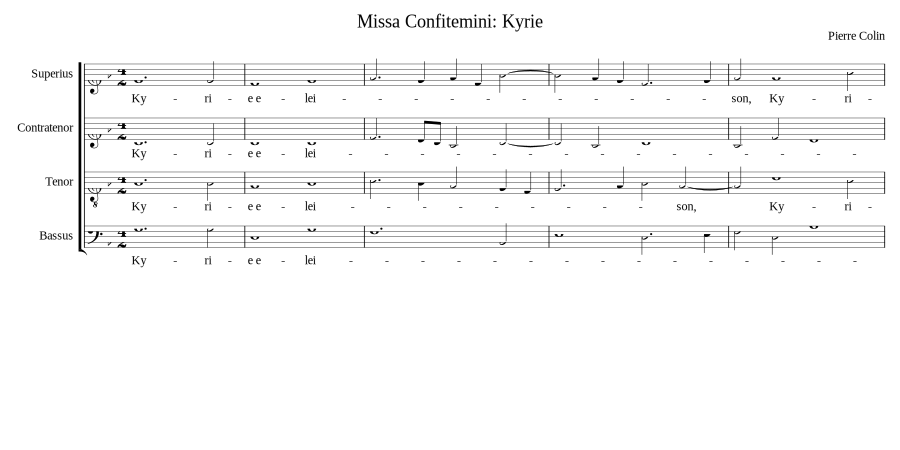

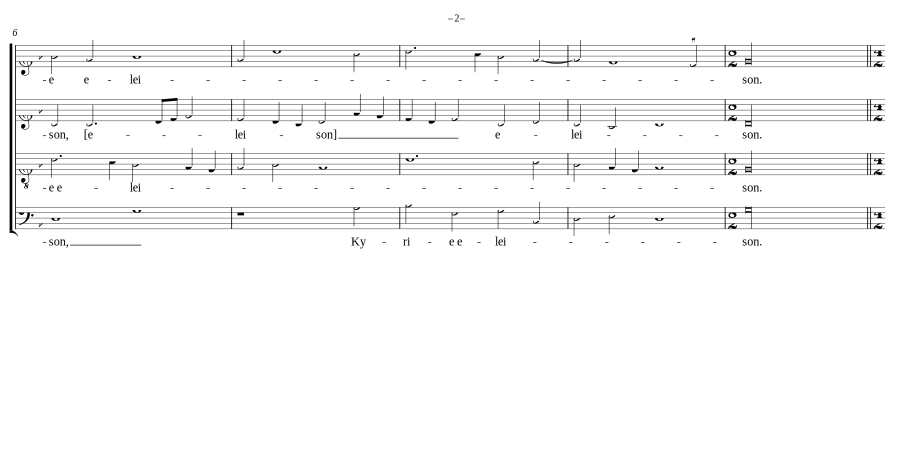

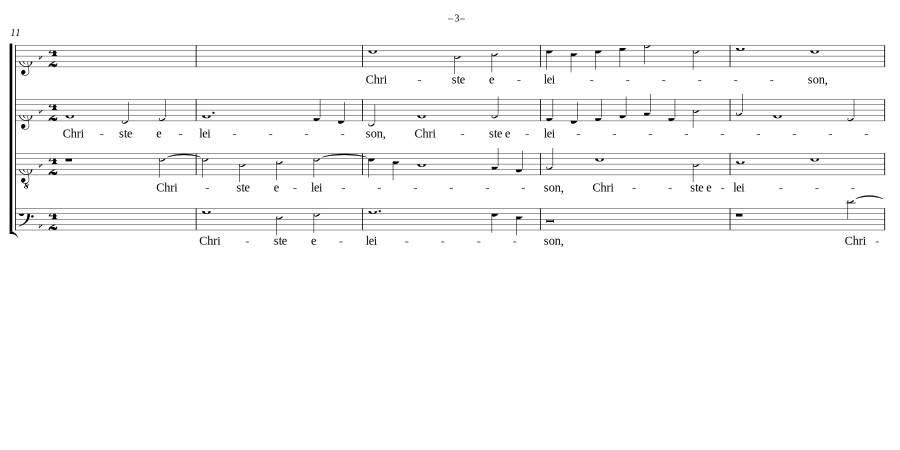

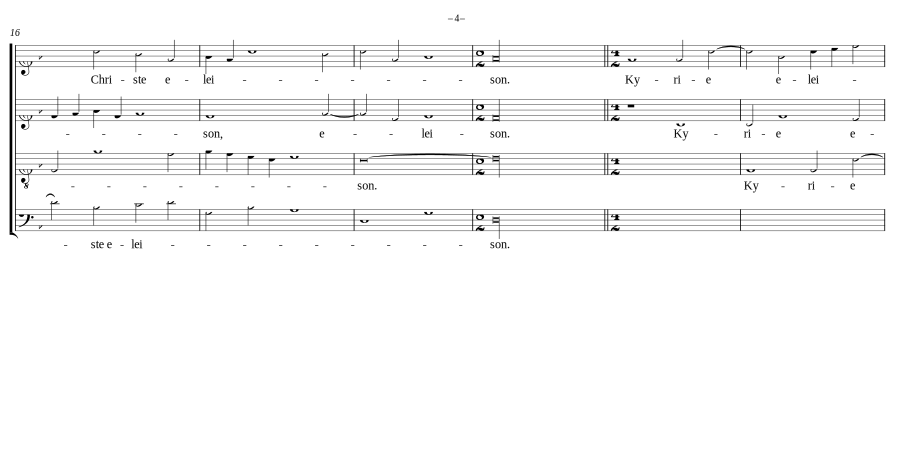

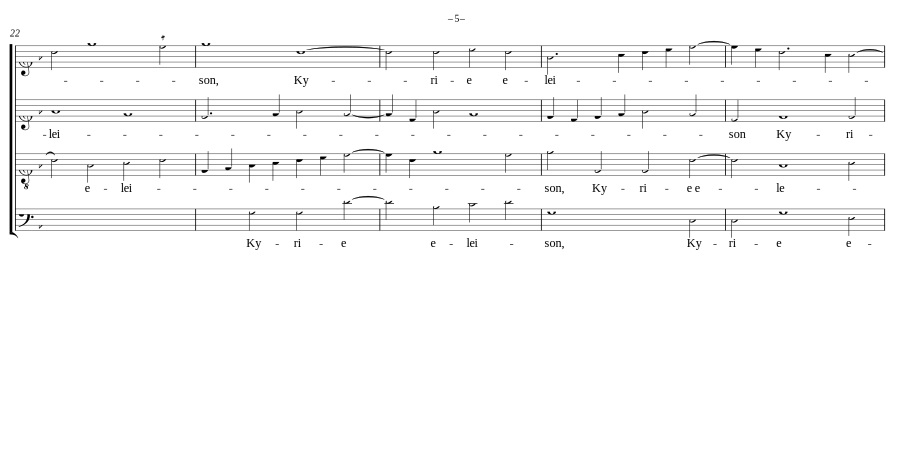

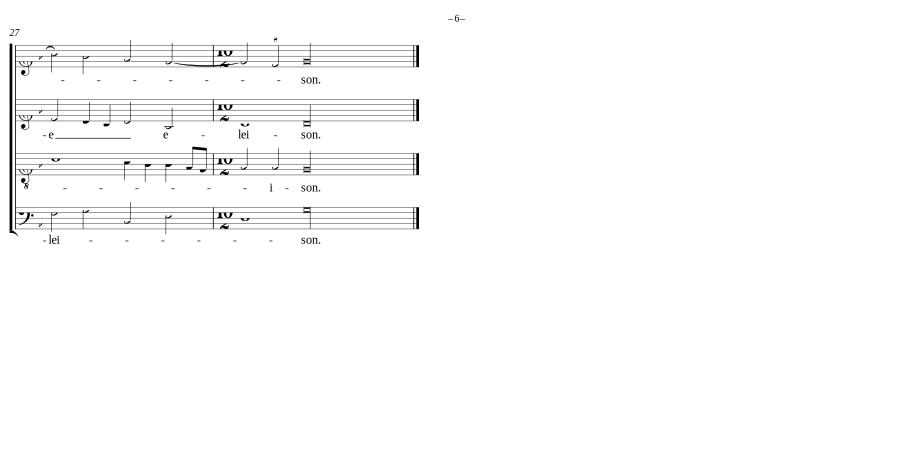

In [382]:
# import verovio (if you are running a CRIM NB, it's already installed)
import verovio
from IPython.display import SVG, HTML
piece_url = 'https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_4.0/CRIM_Mass_0001_1.mei'
piece = piece_url
# check path and import MEI or XML


response = requests.get(piece)
fetched_mei_string = response.text
# start the verovio toolkit and load the file there
tk = verovio.toolkit()
tk.loadData(fetched_mei_string)
tk.setScale(30)
tk.setOption( "pageHeight", "1500" )
tk.setOption( "pageWidth", "3000" )

# # pass in the start and end measures for your example
# start_m = 1
# end_m = 4
# mr = str(start_m ) + "-" + str(end_m)
# mdict = {'measureRange': mr}

# # # select verovio measures and redo layout
# tk.select(str(mdict))
tk.redoLayout()
# get the number of pages and display the music
count = tk.getPageCount()
for c in range(1, count + 1):
    music = tk.renderToSVG(c)
#     print("File Name: ", piece.file_name)
#     print(piece.metadata['composer'])
#     print(piece.metadata['title'])
    display(SVG(music))